# CUSTOMER CLUSTERIZATION 

## HIERARCHICAL CLUSTERING

In [1]:
# Importing Libraries & Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('segmentationdata.csv')

In [4]:
# Exploratory Data Anaysis

In [5]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


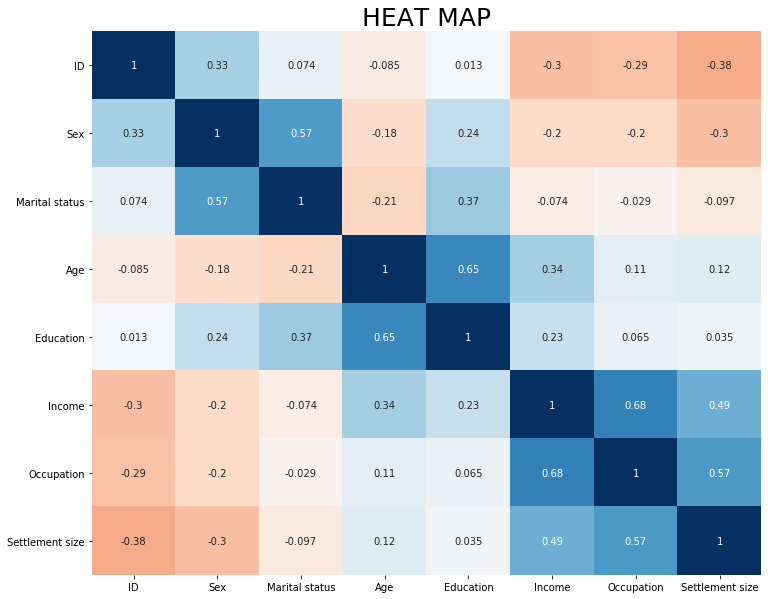

In [8]:
plt.figure(figsize=(12,10))
plt.title('HEAT MAP', fontdict = {'fontsize' : 25})
sns.heatmap(df.corr(), annot=True, cbar=False, cmap='RdBu', vmin=-1, vmax=1)

In [9]:
# Feature Engineering

In [10]:
df.drop('ID', axis=1, inplace=True)

In [11]:
scale = StandardScaler()

In [12]:
df_std = scale.fit_transform(df)

In [13]:
model = linkage(df_std, method='ward')

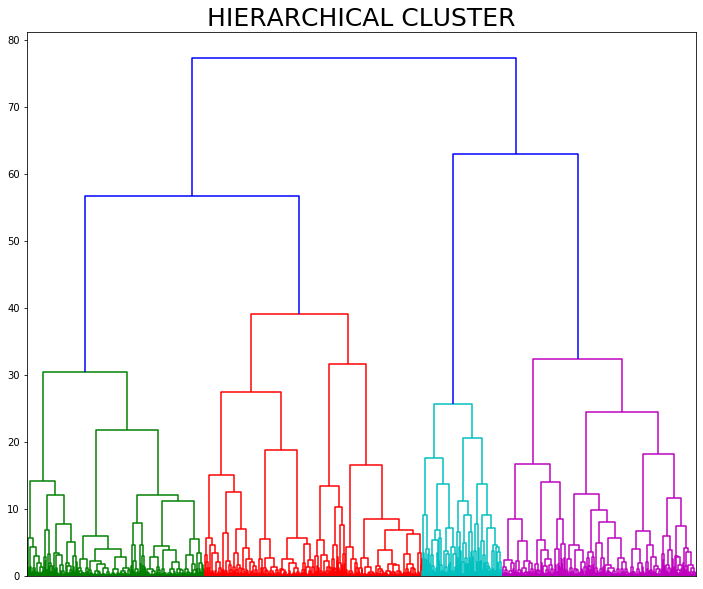

In [14]:
plt.figure(figsize=(12,10))
dendrogram(model, no_labels=True)
plt.title('HIERARCHICAL CLUSTER', fontdict = {'fontsize' : 25})
plt.show()

#### The Largest vertical line without any horizontal line shows that we can divide our customer group by 4 Clusters

## K-MEAN CLUSTERING

In [15]:
# Finding the right number of cluster

In [16]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(df_std)
    wcss.append(model.inertia_)

Text(0.5, 1.0, 'ELBOW METHOD')

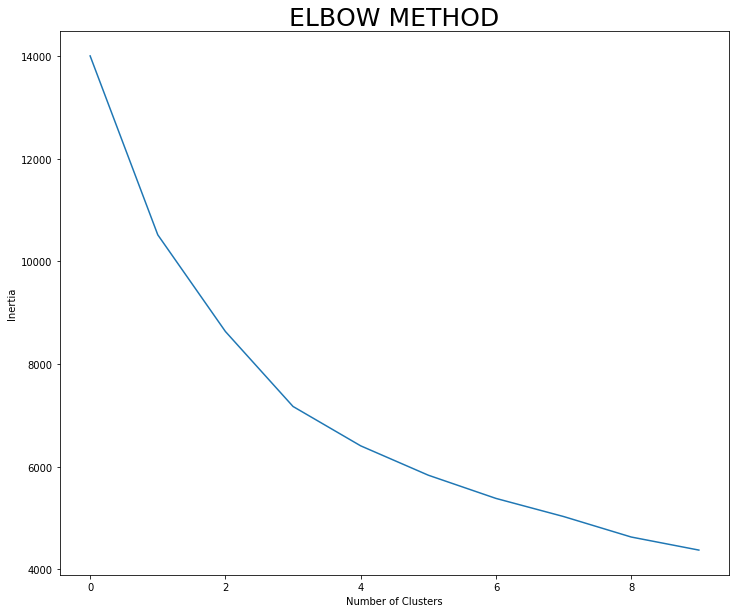

In [17]:
plt.figure(figsize=(12,10))
plt.plot(wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('ELBOW METHOD', fontdict = {'fontsize' : 25})

### 3 or 4 cluster seem to be the best segmentation

In [18]:
cluster_model = KMeans(n_clusters=4, init='k-means++')

In [19]:
cluster_model.fit(df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
cluster_model.labels_

array([2, 1, 3, ..., 3, 1, 3])

In [21]:
df['Kmean_label'] = cluster_model.labels_

In [22]:
df.groupby('Kmean_label').mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Kmean_label,,,,,,,
0,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
2,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
3,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290


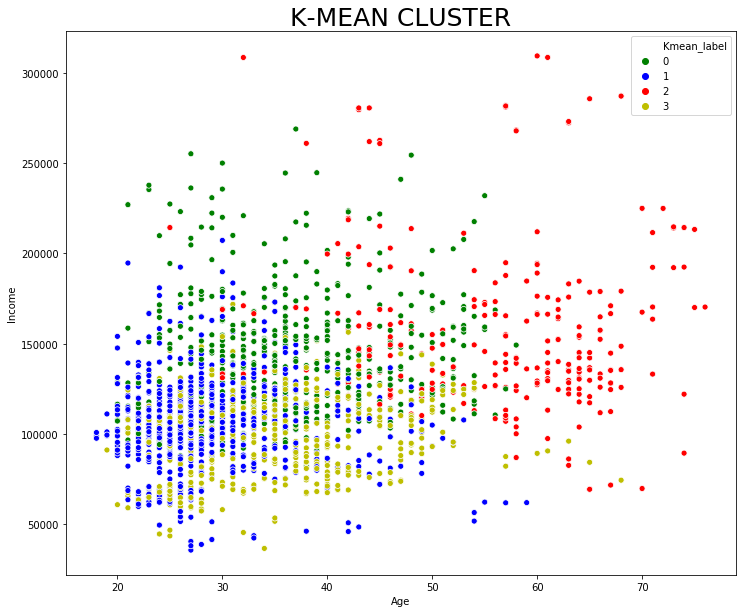

In [23]:
plt.figure(figsize=(12,10))
plt.title('K-MEAN CLUSTER', fontdict = {'fontsize' : 25})
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df['Kmean_label'], palette=['g', 'b', 'r', 'y'])

## PCA & K-MEAN CLUSTERING

In [24]:
# PCA model

In [25]:
model_pca = PCA()

In [26]:
model_pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
model_pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

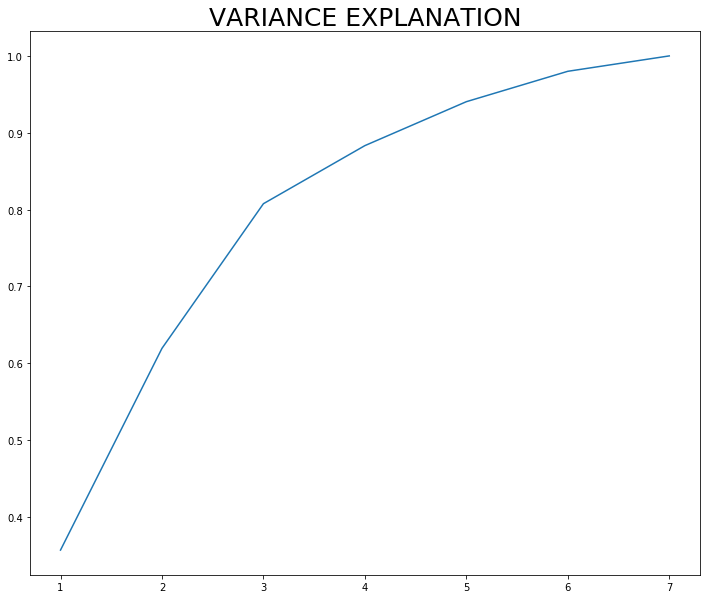

In [28]:
plt.figure(figsize=(12,10))
plt.title('VARIANCE EXPLANATION', fontdict = {'fontsize' : 25})
sns.lineplot(range(1,8), model_pca.explained_variance_ratio_.cumsum(), )

In [29]:
# PCA with 4 components

In [30]:
model_pca = PCA(n_components=4)
model_pca.fit(df_std)  

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
df_pca = model_pca.transform(df_std)

In [32]:
df_pca.shape

(2000, 4)

In [33]:
wcss = []
for i in range(1,10):
    model_pca_kmean = KMeans(n_clusters=i, init='k-means++')
    model_pca_kmean.fit(df_pca)
    wcss.append(model_pca_kmean.inertia_)

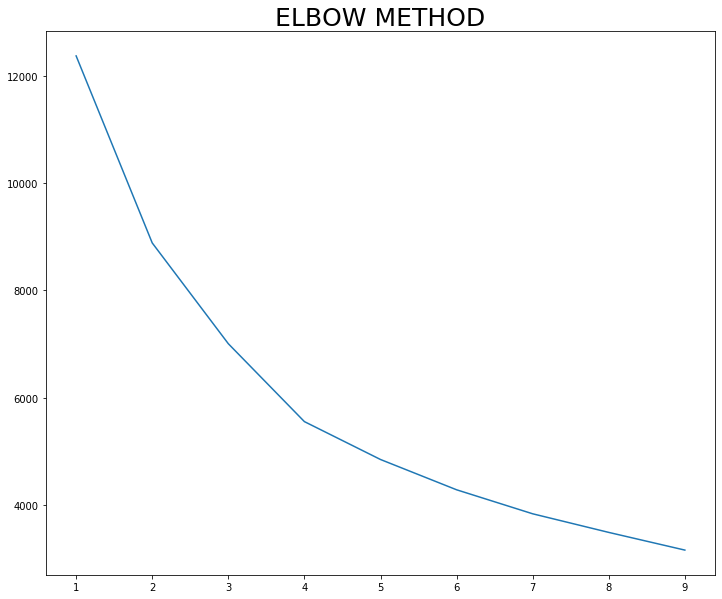

In [34]:
plt.figure(figsize=(12,10))
plt.title('ELBOW METHOD', fontdict = {'fontsize' : 25})
sns.lineplot(range(1,10),wcss)

In [35]:
model_pca_kmean = KMeans(n_clusters=4, init='k-means++')
model_pca_kmean.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
df['pca_kmean_label'] = model_pca_kmean.labels_

In [37]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kmean_label,pca_kmean_label
0,0,0,67,2,124670,1,2,2,2
1,1,1,22,1,150773,1,2,1,1
2,0,0,49,1,89210,0,0,3,3
3,0,0,45,1,171565,1,1,0,0
4,0,0,53,1,149031,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,3,3
1996,1,1,27,1,117744,1,0,1,1
1997,0,0,31,0,86400,0,0,3,3
1998,1,1,24,1,97968,0,0,1,1


In [38]:
df.groupby('Kmean_label')['Age', 'Income', 'Settlement size', 'Sex', 'Marital status', 'Education', 'Occupation'].mean()

C:\Users\15516\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Age,Income,Settlement size,Sex,Marital status,Education,Occupation
Kmean_label,,,,,,,
0,35.635088,141218.249123,1.522807,0.029825,0.173684,0.733333,1.271930
1,28.963121,105759.119149,0.422695,0.853901,0.997163,1.068085,0.634043
2,55.703422,158338.422053,1.110266,0.501901,0.692015,2.129278,1.129278
3,35.577922,97859.852814,0.043290,0.352814,0.019481,0.746753,0.329004


In [39]:
df.groupby('pca_kmean_label')['Age', 'Income', 'Settlement size', 'Sex', 'Marital status', 'Education', 'Occupation'].mean()

C:\Users\15516\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Age,Income,Settlement size,Sex,Marital status,Education,Occupation
pca_kmean_label,,,,,,,
0,35.550173,140737.435986,1.517301,0.025952,0.185121,0.737024,1.262976
1,28.887892,107510.721973,0.433483,0.911809,0.986547,1.064275,0.671151
2,55.689394,158209.094697,1.106061,0.503788,0.689394,2.128788,1.125000
3,35.259714,95850.155419,0.038855,0.319018,0.089980,0.768916,0.296524


Text(0.5, 1.0, 'PCA K-MEAN CLUSTER')

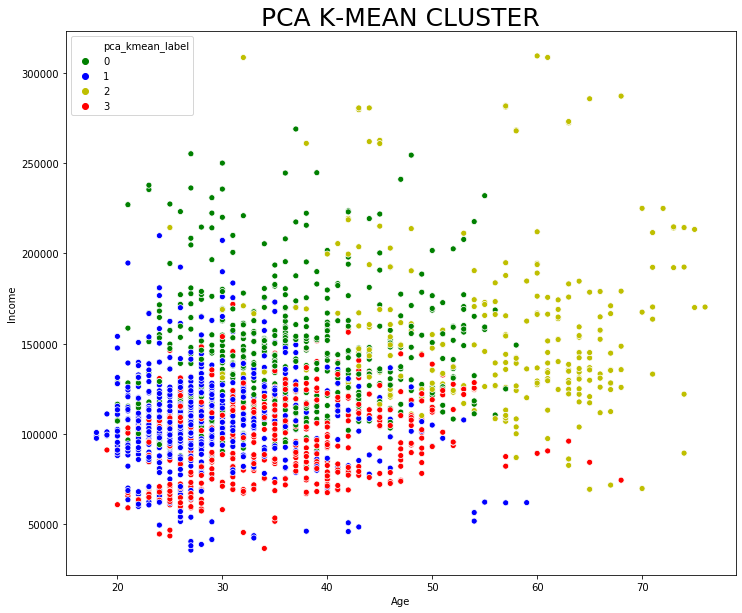

In [40]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df['pca_kmean_label'], palette=['g','b','y','r'])
plt.title('PCA K-MEAN CLUSTER', fontdict = {'fontsize' : 25})

Text(0.5, 1.0, 'K-MEAN CLUSTER')

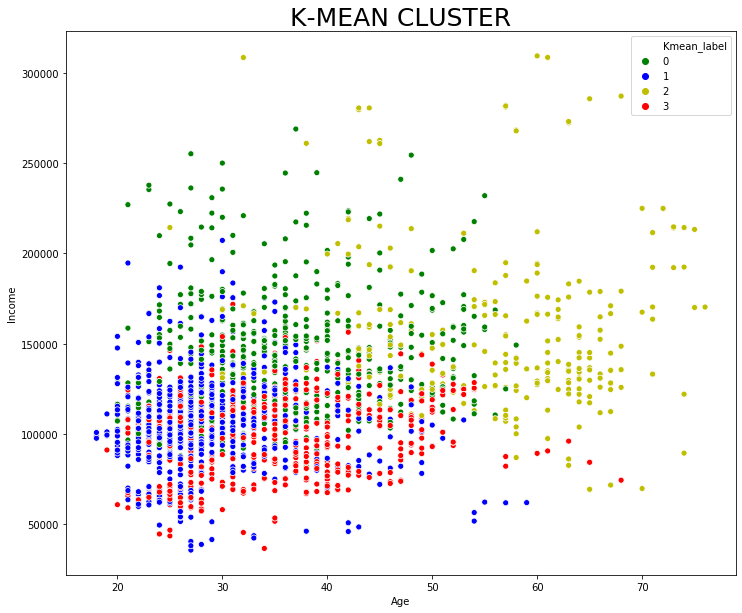

In [41]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df['Age'], y=df['Income'], hue=df['Kmean_label'], palette=['g','b','y','r'])
plt.title('K-MEAN CLUSTER', fontdict = {'fontsize' : 25})

### Both K-Mean, PCA-K-Mean has almost similar cluster pattern